In [1]:
# 导入用到的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# matplotlib 中文 负号的支持
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
# 读取csv文件
data = pd.read_csv(r"FullData.csv")
# 最大列的显示设置
pd.set_option("max_columns",100)
data.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,72 kg,Left,06/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,68 kg,Right,02/05/1992,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,85 kg,Right,01/24/1987,30,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,92 kg,Right,03/27/1986,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89


In [3]:
# 过滤空数据
data = data[data["Club_Position"].notnull()]
# info 查看缺失信息
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17587 entries, 0 to 17587
Data columns (total 53 columns):
Name                  17587 non-null object
Nationality           17587 non-null object
National_Position     1075 non-null object
National_Kit          1075 non-null float64
Club                  17587 non-null object
Club_Position         17587 non-null object
Club_Kit              17587 non-null float64
Club_Joining          17587 non-null object
Contract_Expiry       17587 non-null float64
Rating                17587 non-null int64
Height                17587 non-null object
Weight                17587 non-null object
Preffered_Foot        17587 non-null object
Birth_Date            17587 non-null object
Age                   17587 non-null int64
Preffered_Position    17587 non-null object
Work_Rate             17587 non-null object
Weak_foot             17587 non-null int64
Skill_Moves           17587 non-null int64
Ball_Control          17587 non-null int64
Dribbling      

In [4]:
# 查看是否含有异常值
data.describe()
# 检查是否有重复值
data.duplicated().any()
# 去重
# data.drop_duplicates(inplace=True)

False

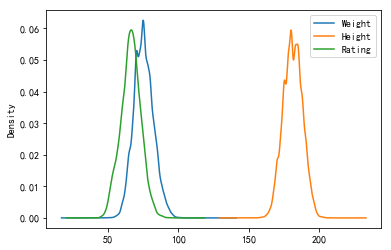

In [5]:
data["Height"] = data["Height"].map(lambda x: int(x.replace("cm","")))
data["Weight"] = data["Weight"].map(lambda x: int(x.replace("kg","")))
# 运动员身高、体重、评分分布
data[["Weight","Height","Rating"]].plot(kind="kde")

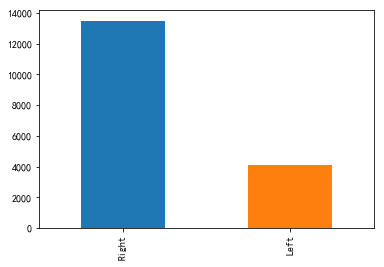

In [7]:
# 运动员左右脚使用比例
data["Preffered_Foot"].value_counts()
# 画图展示
data["Preffered_Foot"].value_counts().plot(kind="bar")

In [31]:
# 统计top10评分能力的俱乐部/国家
# 俱乐部
s = data.groupby("Club")["Rating"].agg(["sum","mean","count"])
# 人数在20人以上
s = s[s["count"]>=20]
s.sort_values("count",ascending=False)
s.sort_values("mean",ascending=False)
s.head(10)

,sum,mean,count
Club,,,
1. FC Heidenheim,1643,65.720000,25
1. FC Köln,1868,71.846154,26
1. FC Nürnberg,1887,67.392857,28
1. FSV Mainz 05,2290,71.562500,32
1860 München,1908,68.142857,28
1899 Hoffenheim,1902,73.153846,26
A. Minas G.,1398,69.900000,20
AC Ajaccio,1621,62.346154,26
AC Horsens,1516,60.640000,25


In [35]:
# 国家队
m = data.groupby("Nationality")["Rating"].agg(["sum","mean","count"])
m = m[m["count"]>=20]
m.sort_values("count",ascending=False)
m.sort_values("mean",ascending=False)
m.head(10)

,sum,mean,count
Nationality,,,
Albania,2437,65.864865,37
Algeria,3581,71.620000,50
Argentina,74083,67.532361,1097
Australia,14610,62.435897,234
Austria,17153,64.484962,266
Belgium,18097,68.290566,265
Bolivia,1965,65.500000,30
Bosnia Herzegovina,3623,69.673077,52
Brazil,64492,70.023887,921


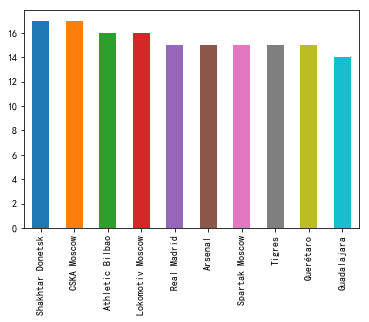

In [38]:
# 分析忠心球员（5年以上球员）
# 获取加入年份
year = data["Club_Joining"].map(lambda x:str(x).split('/')[-1])
year = year.astype(np.int)
t= data[(2018-year>=5) & (data["Club"]!="Free Agents")] 
t["Club"].value_counts().head(10).plot(kind="bar")

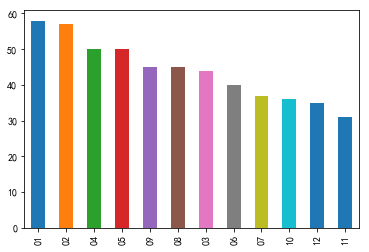

In [49]:
# 分析足球运动员是否与出生月份相关
q = data[data["Rating"]>=80]
q = q["Birth_Date"].str.split('/',expand=True)
q[0].value_counts().plot(kind="bar")

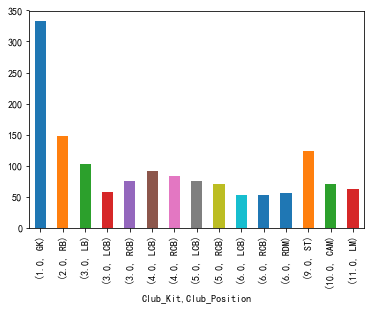

In [54]:
# 球衣号码是否有位置相关
# 去除替补队员和后备球员
t = data[(data["Club_Position"]!= "Sub") & (data["Club_Position"] != "Res")]
x = t.groupby(["Club_Kit","Club_Position"]).size()
x[x>50].plot(kind="bar")

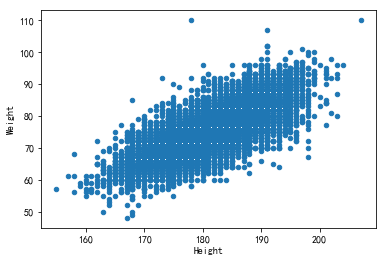

In [55]:
# 身高与体重是否有线性关系
data.plot.scatter(x="Height",y="Weight")

In [58]:
# 哪些技能对评分影响大
# 查看相关系数
data.corr()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Height,Weight,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
National_Kit,1.000000,0.055408,-0.027211,-0.084289,-0.101229,-0.093795,-0.103583,0.027268,0.105903,0.046644,0.093836,-0.162083,-0.152251,-0.148329,-0.073288,-0.058696,0.124641,-0.154804,0.076988,-0.016093,0.045986,0.036071,-0.006230,0.079866,0.056282,0.003828,-0.099086,0.089038,0.085691,-0.100935,-0.072020,0.083610,0.138914,0.109168,0.081888,0.106621,0.095289,0.117381,-0.031492,-0.012435,-0.015472,-0.024611,-0.018816
Club_Kit,0.055408,1.000000,0.077060,-0.172710,-0.028711,-0.072341,-0.198230,-0.037234,0.006378,-0.071067,-0.028584,-0.105522,-0.094920,-0.104446,-0.121709,-0.148887,-0.031746,-0.125007,-0.071177,-0.117220,-0.067383,-0.085123,-0.100525,-0.006315,-0.010092,-0.101258,-0.141140,0.010762,-0.036128,-0.106797,-0.076264,-0.051829,-0.007898,-0.040658,-0.053631,-0.062077,-0.016220,-0.020482,0.004684,0.011290,0.008788,0.006725,0.007480
Contract_Expiry,-0.027211,0.077060,1.000000,0.047430,-0.080641,-0.053049,-0.118370,0.004865,0.044511,0.035324,0.048664,0.015409,0.011482,0.008307,-0.010361,0.051309,0.043698,0.006995,0.028113,0.005840,0.012553,0.034513,0.016371,0.071003,0.079394,0.053830,-0.012495,0.046095,0.047667,0.002805,0.026235,0.021477,0.032341,0.028781,0.010840,0.007001,0.020878,0.025120,-0.027994,-0.026117,-0.023273,-0.023064,-0.024923
Rating,-0.084289,-0.172710,0.047430,1.000000,0.046937,0.139703,0.458098,0.226263,0.251926,0.463211,0.368565,0.236843,0.215385,0.249156,0.404422,0.828329,0.354501,0.319504,0.489277,0.613612,0.401851,0.496239,0.483217,0.206392,0.224253,0.355335,0.369045,0.087811,0.283309,0.289840,0.343265,0.441773,0.328576,0.419517,0.420796,0.399575,0.339898,0.386494,-0.018586,-0.027615,-0.031696,-0.021343,-0.022978
Height,-0.101229,-0.028711,-0.080641,0.046937,1.000000,0.758208,0.076727,-0.180431,-0.431177,-0.402596,-0.483545,-0.042485,-0.069602,-0.054282,-0.049009,-0.016407,-0.419544,-0.050358,-0.359610,-0.169460,-0.471327,-0.356768,-0.323575,-0.521688,-0.451128,-0.293564,0.537223,-0.799775,-0.611198,-0.063048,0.005367,-0.273413,-0.347154,-0.364182,-0.423115,-0.380217,-0.321246,-0.333576,0.358795,0.357683,0.356070,0.359746,0.360260
Weight,-0.093795,-0.072341,-0.053049,0.139703,0.758208,1.000000,0.223432,-0.135402,-0.375163,-0.338460,-0.412959,-0.030512,-0.062312,-0.047097,0.017366,0.079019,-0.344840,-0.028947,-0.283098,-0.083541,-0.389293,-0.299264,-0.261611,-0.465558,-0.404240,-0.241365,0.613829,-0.680791,-0.535404,0.005842,0.019235,-0.188739,-0.281775,-0.274446,-0.343380,-0.293956,-0.246189,-0.258932,0.342502,0.340775,0.339505,0.341829,0.341785
Age,-0.103583,-0.198230,-0.118370,0.458098,0.076727,0.223432,1.000000,0.086137,-0.016088,0.082875,0.004575,0.131425,0.096679,0.116847,0.259413,0.456724,0.073873,0.192667,0.189982,0.355588,0.134576,0.127537,0.179109,-0.175966,-0.168440,0.070685,0.329289,-0.100131,-0.019459,0.168694,0.137785,0.151174,0.064487,0.149635,0.139101,0.195338,0.131469,0.133950,0.122371,0.105158,0.109931,0.113216,0.106979
Weak_foot,0.027268,-0.037234,0.004865,0.226263,-0.180431,-0.135402,0.086137,1.000000,0.336905,0.367420,0.363398,0.026950,0.025865,0.043656,0.134120,0.207098,0.354699,0.058148,0.352235,0.316486,0.324117,0.338919,0.298103,0.257156,0.240919,0.228619,-0.004841,0.253466,0.306049,0.064655,0.190847,0.334897,0.361983,0.365637,0.359044,0.345745,0.340757,0.366610,-0.232109,-0.236372,-0.230924,-0.233080,-0.235275
Skill_Moves,0.105903,0.006378,0.044511,0.251926,-0.431177,-0.375163,-0.016088,0.336905,1.000000,0.727123,0.762623,0.032811,0.043037,0.070841,0.230424,0.223236,0.719577,0.067407,0.591623,0.490854,0.644761,0.628088,0.515631,0.619623

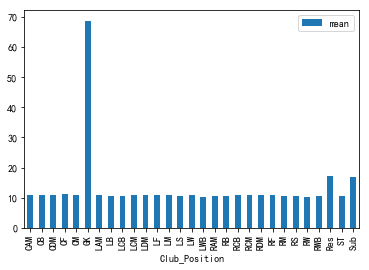

In [85]:
# 对位置进行分组
g = data.groupby("Club_Position")
g["GK_Positioning"].agg(["mean"]).plot(kind="bar")

E:\Anaconder3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


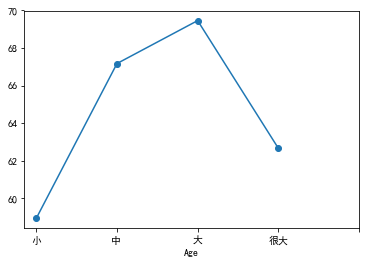

In [88]:
# 分析年龄与评分之间是否有关联
t = data[["Age","Rating"]]
t["Age"] = pd.cut(data["Age"],bins=[0,20,30,40,100],labels=["小","中","大","很大"])
t.groupby("Age")["Rating"].mean().plot(kind="line",xticks=[0,1,2,3,4],marker='o')